# Comparing multi-omics to single-omics analysis

(*My comments are in bracket italics like this*)

Our aim is to investigate if a multi-omics approach can reveal biologically relevant signals in data which are weak in single-omics approaches. Therefore, we compare and contrast the features detected in several multi-omics data and single-omics analyses. These were reduced to 4 feature lists which are aggregated and assessed for overlaps. 

1. A proteomics and translatomics dataset were surveyed with a supervised multivariate strategy. 
2. A single-omics method and multi-omics method were used. 
3. Each workflow identified a set of features which strongly discriminated between the biological categories of data surveyed. 
<!-- 4. From the multi-omics lists of features only, correlations within and between features of each omics data block were identified. -->
4. We summarise this information into 4 feature lists, which are then aggregated and reviewed.
  - Reviewing low level features **(all components)** contributing to classification between **all biological** categories
  - Reviewing low level features **(all components)** contributing to classification between **viral against all** biological categories
  - Reviewing low level features **(1st component)** contributing to classification between **all biological** categories
  - Reviewing low level features **(1st component)** contributing to classification between **viral against all** biological categories

| Sample categories  |
|-------------|
| Control 2h  |
| Control 6h  |
| Control 10h |
| Control 24h |
| Virus 2h    |
| Virus 6h    |
| Virus 10h   |
| Virus 24h   |

Feature lists:
- Single omics proteome
- Single omics translatome
- Multi omics proteome
- Multi omics translatome
<!-- - Multi omics feature correlations
 -->
<!-- In the case of multi omics feature correlations, this is a subset of the multi omics proteome and translatome feature lists. This is further filtered by correlation scores (strong positive or strong negative correlations).
 -->
> NOTE: **Viral samples 24 hours post-infection** were the most distinct from all other samples (not shown in this document). Most of the identified features, particularly on the first component, contribute to the difference between this biological category and all others.

Primary files can be obtained by rerunning the pipeline or exporting the data from the `RData` object. In this notebook, previously exported and parsed data is presented as simpler format for convenience.

In [1]:
# The raw code for this IPython notebook is by default hidden for easier reading.
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from upsetplot import from_contents, generate_counts, plot, UpSet
%matplotlib inline

In [3]:
# load the annotations first for later reference
# host_annotations_infile = "../data/panther.txt"
host_annotations_infile = "../data/pantherGeneList.txt"
# viral_annotations_infile = "../data/uniprot_SARS-COV2_annotations.tab"
viral_annotations_infile = "../data/uniprot_annot.tab.gz"
host_annotations = pd.read_csv(host_annotations_infile, header=None, sep="\t")

viral_annotations = pd.read_csv(viral_annotations_infile, sep="\t")
viral_annotations = viral_annotations[["Entry", "Gene names", "Protein names", "Organism"]]
viral_annotations["Ontology"] = None
# viral_annotations["Species"] = "SARS-CoV-2"

host_annotations.rename(columns={2:"Protein names", 4:"Ontology", 5:"Organism"}, inplace=True)
host_annotations["Entry"] = [x.split("=")[-1] for x in host_annotations[0].tolist()]
host_annotations.drop(columns=[0, 1, 3], inplace=True)
host_annotations["Gene names"] = None
host_annotations = host_annotations[["Entry", "Gene names", "Protein names", "Ontology", "Organism"]]

host_annotations.set_index("Entry", inplace=True)
viral_annotations.set_index("Entry", inplace=True)
all_annotations = pd.concat([host_annotations, viral_annotations])
all_annotations.to_csv("../results/all_annotations.tsv", sep="\t")
all_annotations.reset_index(inplace=True)

all_annotations.drop_duplicates(subset="Entry", inplace=True)
# all_annotations

In [4]:
# diablo correlations
diablo_corr_infile = "../results/multiblock_correlations_annotated.tsv"
diablo_corr = pd.read_csv(diablo_corr_infile, sep="\t", index_col=0)

# filter out weak negative and weak positive correlations
filtered_corr = diablo_corr[(diablo_corr.correlation > 0.5) | (diablo_corr.correlation < -0.5)]
filtered_prot = list(set(filtered_corr.proteome.tolist()))
filtered_tran = list(set(filtered_corr.translatome.tolist()))
filtered_all = list(set(filtered_prot + filtered_tran))
print(len(filtered_prot), len(filtered_tran), len(filtered_all))
correlations = [filtered_prot, filtered_tran, filtered_all]

# all features in all components
# these files were output by exporting loadings per component and concatenating
prot_splsda_infile = "../results/proteome_splsda.txt"
prot_diablo_infile = "../results/proteome_diablo.txt"
tran_splsda_infile = "../results/translatome_splsda.txt"
tran_diablo_infile = "../results/translatome_diablo.txt"

prot_splsda = pd.read_csv(prot_splsda_infile, sep="\t", header=None)
prot_diablo = pd.read_csv(prot_diablo_infile, sep="\t", header=None)
tran_splsda = pd.read_csv(tran_splsda_infile, sep="\t", header=None)
tran_diablo = pd.read_csv(tran_diablo_infile, sep="\t", header=None)
all_workflows = [prot_splsda, prot_diablo, tran_splsda, tran_diablo]

# all features in the first component
# these files were output by exporting loadings for the first component
prot_splsda_1_infile = "../results/proteome_splsda_1.txt"
prot_diablo_1_infile = "../results/proteome_diablo_1.txt"
tran_splsda_1_infile = "../results/translatome_splsda_1.txt"
tran_diablo_1_infile = "../results/translatome_diablo_1.txt"

prot_splsda_1 = pd.read_csv(prot_splsda_1_infile, sep="\t", header=None)
prot_diablo_1 = pd.read_csv(prot_diablo_1_infile, sep="\t", header=None)
tran_splsda_1 = pd.read_csv(tran_splsda_1_infile, sep="\t", header=None)
tran_diablo_1 = pd.read_csv(tran_diablo_1_infile, sep="\t", header=None)
all_workflows_1 = [prot_splsda_1, prot_diablo_1, tran_splsda_1, tran_diablo_1]

97 64 158


In [5]:
def extract_entries(data, colname=1, colval="Virus_24h"):
    return data.loc[data[colname] == colval][0].tolist()

def parse_entries(data):
    data = [[y for z in [x.split("_") for x in j] for y in z] for j in data]
    return [list(set(x)) for x in data]

def intersect(data, f1, f2):
    return list(set.intersection(set(data[f1]), set(data[f2])))

def union(data, f1, f2):
    return list(set.union(set(data[f1]), set(data[f2])))

categories = [
    "P SPLSDA", "T SPLSDA", 
    "P DIABLO", "T DIABLO",
#     "P correlation", "T correlation",
#     "Correlation DIABLO",
]

all_features = [
    prot_splsda[0].tolist(),
    tran_splsda[0].tolist(),
    prot_diablo[0].tolist(),
    tran_diablo[0].tolist(),
]
# ] + [correlations[2]]

all_features = dict(zip(categories, parse_entries(all_features)))

viral_features = [extract_entries(i) for i in all_workflows]
viral_features = dict(zip(categories, parse_entries(viral_features)))# + [correlations[2]])))

print([len(x) for x in all_features.values()])
print([len(x) for x in viral_features.values()])

[116, 200, 111, 65]
[44, 13, 26, 14]


<!-- ## Features identified by DIABLO are further filtered on correlation strength

We show that the correlations are a subset of the features identified by DIABLO. -->

In [6]:
# all_uniprot = list(set([y for z in [x.split("_") for x in pd.concat(all_workflows)[0].tolist()] for y in z]))

## Reviewing low level features (all components) contributing to classification between all biological categories

We obtained the biological features across **all components** highlighted by single omics (sPLSDA) and multi omics (DIABLO) analyses. These represent the **biological features which best discriminate between all sample categories**. To review feature overlaps, quantitative venn diagrams (upsetplots) were then plotted.

<!-- From the multi omics data, correlation scores are obtained between features and further filtered. -->

Biological features highlighted by multi omics analyses appear to be a subset of features highlighted by single omics analyses. (Both single omics and multi omics return the same features) This suggests the possibility that single omics data are returning false positives (*i need to back this argument up though, examine features with pathway analysis?*), and indicates that multi omics is recapitulating the data recovered in single omics analysis.

<!-- > NOTE: The set of correlations across omics data (*Correlation DIABLO*) is a subset of the feature loadings returned by DIABLO (*T DIABLO*, *P DIABLO*), and for this reason a large overlap is expected. -->

{'matrix': <matplotlib.axes._subplots.AxesSubplot at 0x11ac08490>,
 'shading': <matplotlib.axes._subplots.AxesSubplot at 0x11a8f5880>,
 'totals': <matplotlib.axes._subplots.AxesSubplot at 0x109803400>,
 'intersections': <matplotlib.axes._subplots.AxesSubplot at 0x10984f370>}

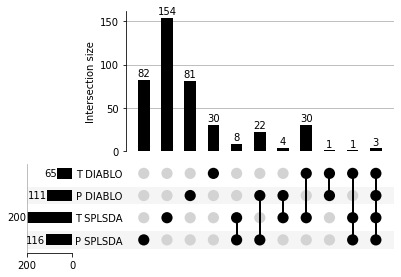

In [7]:
data = [from_contents(x) for x in [all_features, viral_features]]
upset = UpSet(data[0], subset_size="count", show_counts="%d", sort_categories_by=None)
upset.plot()

In [8]:
print("Features detected by both single and multi omics methods in proteome")
prot_feat_all_comp_all = intersect(all_features, "P SPLSDA", "P DIABLO")
prot_feat_all_comp_all_annot = all_annotations[all_annotations["Entry"].isin(prot_feat_all_comp_all)]
prot_feat_all_comp_all_annot["Entry"].tolist()
print(prot_feat_all_comp_all_annot.shape)
# [print(x) for x in prot_feat_all_comp_all_annot["Entry"].tolist()]
prot_feat_all_comp_all_annot

Features detected by both single and multi omics methods in proteome
(25, 5)


,Entry,Gene names,Protein names,Ontology,Organism
58,Q2TAA5,None,"GDP-Man:Man(3)GlcNAc(2)-PP-Dol alpha-1,2-manno...",NaN,Homo sapiens
73,P31153,None,S-adenosylmethionine synthase isoform type-2;M...,nucleotidyltransferase(PC00174),Homo sapiens
96,Q7Z3J2,None,VPS35 endosomal protein sorting factor-like;VP...,NaN,Homo sapiens
108,P15260,None,Interferon gamma receptor 1;IFNGR1;ortholog,transmembrane signal receptor(PC00197),Homo sapiens
109,Q15465,None,Sonic hedgehog protein;SHH;ortholog,NaN,Homo sapiens
163,P06748,None,Nucleophosmin;NPM1;ortholog,chaperone(PC00072),Homo sapiens
178,P08174,None,Complement decay-accelerating factor;CD55;orth...,NaN,Homo sapiens
200,Q9NPE3,None,H/ACA ribonucleoprotein complex subunit 3;NOP1...,RNA binding protein(PC00031),Homo sapiens
204,P04259,None,"Keratin, type II cytoskeletal 6B;KRT6B;ortholog",NaN,Homo sapiens
213,P13647,None,"Keratin, type II cytoskeletal 5;KRT5;ortholog",NaN,Homo sapiens


In [9]:
print("Features detected by single omics methods only in proteome")
prot_feat_all_comp_all = intersect(all_features, "P SPLSDA", "P DIABLO")
prot_feat_all_comp_all_union = union(all_features, "P SPLSDA", "P DIABLO")
prot_feat_all_comp_all_invert = list(set(prot_feat_all_comp_all_union) - set(prot_feat_all_comp_all))
prot_feat_all_comp_all_invert = all_annotations[all_annotations["Entry"].isin(prot_feat_all_comp_all_invert)]
prot_feat_all_comp_all_invert["Entry"].tolist()
print(prot_feat_all_comp_all_invert.shape)
# [print(x) for x in prot_feat_all_comp_all_invert["Entry"].tolist()]
prot_feat_all_comp_all_invert

Features detected by single omics methods only in proteome
(176, 5)


,Entry,Gene names,Protein names,Ontology,Organism
1,P00374,None,Dihydrofolate reductase;DHFR;ortholog,NaN,Homo sapiens
2,P02647,None,Apolipoprotein A-I;APOA1;ortholog,NaN,Homo sapiens
5,Q9BXS6,None,Nucleolar and spindle-associated protein 1;NUS...,NaN,Homo sapiens
11,Q2UVX4,None,Complement C3;C3;ortholog,protease inhibitor(PC00191),Bos taurus
15,P30046,None,D-dopachrome decarboxylase;DDT;ortholog,decarboxylase(PC00089),Homo sapiens
...,...,...,...,...,...
402,Q96PU5,None,E3 ubiquitin-protein ligase NEDD4-like;NEDD4L;...,ubiquitin-protein ligase(PC00234),Homo sapiens
404,Q9NY93,None,Probable ATP-dependent RNA helicase DDX56;DDX5...,NaN,Homo sapiens
405,P46934,None,E3 ubiquitin-protein ligase NEDD4;NEDD4;ortholog,ubiquitin-protein ligase(PC00234),Homo sapiens
801,Q9TRI1,NaN,Inter-alpha-trypsin inhibitor HC2 component ho...,None,Bos taurus (Bovine)


Proteomic features **across all components which best discriminate between all sample categories** common across single omics and multi omics data show enrichment of the pathways `Formation of the cornified envelope` and
`Keratinization`. These pathways are associated with the keratinization process, and may be an indicator of cell death. Various viral features are present as well, but not included in pathway analysis due to their novelty. In contrast, the set of proteomic features detected by single omics data alone shows no significant pathway enrichment.

In [10]:
print("Features detected by single and multi omics methods in translatome")
tran_feat_all_comp_all = intersect(all_features, "T SPLSDA", "T DIABLO")
tran_feat_all_comp_all_annot = all_annotations[all_annotations["Entry"].isin(tran_feat_all_comp_all)]
tran_feat_all_comp_all_annot["Entry"].tolist()
print(tran_feat_all_comp_all_annot.shape)
tran_feat_all_comp_all_annot
# [print(x) for x in tran_feat_all_comp_all_annot["Entry"].tolist()]

Features detected by single and multi omics methods in translatome
(34, 5)


,Entry,Gene names,Protein names,Ontology,Organism
10,P05388,None,60S acidic ribosomal protein P0;RPLP0;ortholog,NaN,Homo sapiens
14,P08865,None,40S ribosomal protein SA;RPSA;ortholog,ribosomal protein(PC00202),Homo sapiens
42,Q14978,None,Nucleolar and coiled-body phosphoprotein 1;NOL...,NaN,Homo sapiens
54,P09211,None,Glutathione S-transferase P;GSTP1;ortholog,NaN,Homo sapiens
57,Q96A33,None,Coiled-coil domain-containing protein 47;CCDC4...,NaN,Homo sapiens
80,P35754,None,Glutaredoxin-1;GLRX;ortholog,NaN,Homo sapiens
92,Q9BUL9,None,Ribonuclease P protein subunit p25;RPP25;ortholog,endoribonuclease(PC00094),Homo sapiens
93,P10412,None,Histone H1.4;HIST1H1E;ortholog,histone(PC00118),Homo sapiens
96,Q7Z3J2,None,VPS35 endosomal protein sorting factor-like;VP...,NaN,Homo sapiens
105,P28370,None,Probable global transcription activator SNF2L1...,DNA helicase(PC00011),Homo sapiens


In [34]:
print("Features detected by single omics methods only in translatome")
tran_feat_all_comp_all = intersect(all_features, "T SPLSDA", "T DIABLO")
tran_feat_all_comp_all_union = union(all_features, "T SPLSDA", "T DIABLO")
tran_feat_all_comp_all_invert = list(set(prot_feat_all_comp_all_union) - set(tran_feat_all_comp_all))
tran_feat_all_comp_all_invert = all_annotations[all_annotations["Entry"].isin(tran_feat_all_comp_all_invert)]
tran_feat_all_comp_all_invert["Entry"].tolist()
print(tran_feat_all_comp_all_invert.shape)
# [print(x) for x in tran_feat_all_comp_all_invert["Entry"].tolist()]
tran_feat_all_comp_all_invert

Features detected by single omics methods only in translatome
(197, 5)


,Entry,Gene names,Protein names,Ontology,Organism
1,P00374,None,Dihydrofolate reductase;DHFR;ortholog,NaN,Homo sapiens
2,P02647,None,Apolipoprotein A-I;APOA1;ortholog,NaN,Homo sapiens
5,Q9BXS6,None,Nucleolar and spindle-associated protein 1;NUS...,NaN,Homo sapiens
11,Q2UVX4,None,Complement C3;C3;ortholog,protease inhibitor(PC00191),Bos taurus
15,P30046,None,D-dopachrome decarboxylase;DDT;ortholog,decarboxylase(PC00089),Homo sapiens
...,...,...,...,...,...
718,P0DTC3,3a,ORF3a protein (Accessory protein 3a) (Protein ...,None,Severe acute respiratory syndrome coronavirus ...
721,P0DTC2,S 2,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,None,Severe acute respiratory syndrome coronavirus ...
738,P0DTC6,6,ORF6 protein (Accessory protein 6) (Non-struct...,None,Severe acute respiratory syndrome coronavirus ...
801,Q9TRI1,NaN,Inter-alpha-trypsin inhibitor HC2 component ho...,None,Bos taurus (Bovine)


Translatomic features across **all components which best discriminate between all sample categories common across single omics and multi omics data** show enrichment of many pathways associated with viral function, cellular stress and membrane targeting, which make sense in the context of SARS-CoV-2 infection. In contrast, the set of translatomic features detected by single omics data alone shows no significant pathway enrichment other than `Formation of the cornified envelope`.

## Reviewing low level features (all components) contributing to classification of viral samples post 24 hour infection

We then selected features which best discriminated **viral samples post 24 hour infection against other samples** across **all components**. We note that this sample category (Virus 24h) was the most distinct from all other sample categories (*not shown in this document*).

Using features contributing to the 24 hour post infection category only, we show that features identified segregate by type of analysis (single omics vs multi omics). This suggests that single omics and multi omics analyses are detecting different features. (*how to investigate which is more accurate, single-omics or multi-omics? refer to biology of individual features/pathways?*)

{'matrix': <matplotlib.axes._subplots.AxesSubplot at 0x11aa67eb0>,
 'shading': <matplotlib.axes._subplots.AxesSubplot at 0x11a954be0>,
 'totals': <matplotlib.axes._subplots.AxesSubplot at 0x11aae49d0>,
 'intersections': <matplotlib.axes._subplots.AxesSubplot at 0x11ab1d700>}

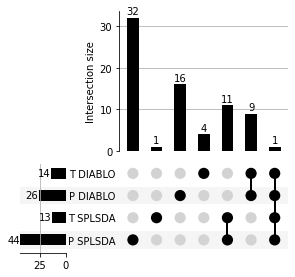

In [12]:
upset = UpSet(data[1], subset_size="count", show_counts="%d", sort_categories_by=None)
upset.plot()

In [13]:
splsda_feat_vir_comp_all = intersect(viral_features, "P SPLSDA", "T SPLSDA")
splsda_feat_vir_comp_all_annot = all_annotations[all_annotations["Entry"].isin(splsda_feat_vir_comp_all)]
splsda_feat_vir_comp_all_annot["Entry"].tolist()
print(splsda_feat_vir_comp_all_annot.shape)
splsda_feat_vir_comp_all_annot
# [print(x) for x in splsda_feat_vir_comp_all_annot["Entry"].tolist()]

(12, 5)


,Entry,Gene names,Protein names,Ontology,Organism
58,Q2TAA5,None,"GDP-Man:Man(3)GlcNAc(2)-PP-Dol alpha-1,2-manno...",NaN,Homo sapiens
96,Q7Z3J2,None,VPS35 endosomal protein sorting factor-like;VP...,NaN,Homo sapiens
163,P06748,None,Nucleophosmin;NPM1;ortholog,chaperone(PC00072),Homo sapiens
200,Q9NPE3,None,H/ACA ribonucleoprotein complex subunit 3;NOP1...,RNA binding protein(PC00031),Homo sapiens
366,O95274,None,Ly6/PLAUR domain-containing protein 3;LYPD3;or...,transmembrane signal receptor(PC00197),Homo sapiens
395,O15162,None,Phospholipid scramblase 1;PLSCR1;ortholog,transporter(PC00227),Homo sapiens
413,P0DTC1,NaN,Replicase polyprotein 1a (pp1a) (ORF1a polypro...,None,Severe acute respiratory syndrome coronavirus ...
445,P0DTD2,9b,ORF9b protein (Accessory protein 9b) (ORF-9b) ...,None,Severe acute respiratory syndrome coronavirus ...
704,P0DTC9,N,Nucleoprotein (Nucleocapsid protein) (NC) (Pro...,None,Severe acute respiratory syndrome coronavirus ...
718,P0DTC3,3a,ORF3a protein (Accessory protein 3a) (Protein ...,None,Severe acute respiratory syndrome coronavirus ...


Within the single omics analysis, we examine **features across all components which best discriminate between 24h viral infection samples against all other sample categories in both proteome and translatome**. No significant pathways are detected during pathway enrichment. Various viral features are present as well, but not included in pathway analysis due to their novelty.

In [14]:
diablo_feat_vir_comp_all = intersect(viral_features, "P DIABLO", "T DIABLO")
diablo_feat_vir_comp_all_annot = all_annotations[all_annotations["Entry"].isin(diablo_feat_vir_comp_all)]
diablo_feat_vir_comp_all_annot["Entry"].tolist()
print(diablo_feat_vir_comp_all_annot.shape)
diablo_feat_vir_comp_all_annot
# [print(x) for x in diablo_feat_vir_comp_all_annot["Entry"].tolist()]

(10, 5)


,Entry,Gene names,Protein names,Ontology,Organism
57,Q96A33,None,Coiled-coil domain-containing protein 47;CCDC4...,NaN,Homo sapiens
96,Q7Z3J2,None,VPS35 endosomal protein sorting factor-like;VP...,NaN,Homo sapiens
150,Q5T6V5,None,Queuosine salvage protein;C9orf64;ortholog,NaN,Homo sapiens
177,P21291,None,Cysteine and glycine-rich protein 1;CSRP1;orth...,actin or actin-binding cytoskeletal protein(PC...,Homo sapiens
226,Q9NX63,None,MICOS complex subunit MIC19;CHCHD3;ortholog,NaN,Homo sapiens
233,Q07021,None,Complement component 1 Q subcomponent-binding ...,NaN,Homo sapiens
277,Q03701,None,CCAAT/enhancer-binding protein zeta;CEBPZ;orth...,DNA-binding transcription factor(PC00218),Homo sapiens
302,P47756,None,F-actin-capping protein subunit beta;CAPZB;ort...,non-motor actin binding protein(PC00165),Homo sapiens
371,Q00839,None,Heterogeneous nuclear ribonucleoprotein U;HNRN...,NaN,Homo sapiens
397,Q9Y281,None,Cofilin-2;CFL2;ortholog,non-motor actin binding protein(PC00165),Homo sapiens


Within the multi omics analysis, we examine **features across all components which best discriminate between 24h viral infection samples against all other sample categories in both proteome and translatome**. No significant pathways are detected during pathway enrichment. Various viral features are present as well, but not included in pathway analysis due to their novelty.

## Reviewing low level features (component 1) contributing to classification between all biological categories

We obtained the biological features across the **first component** highlighted by single omics (sPLSDA) and multi omics (DIABLO) analyses. These represent the biological features which best discriminate between all sample categories. To review feature overlaps, quantitative venn diagrams (upsetplots) were then plotted.

<!-- From the multi omics data, correlation scores are obtained between features and further filtered. -->

We observed similarities in patterns when assessing features across all components and only the first component. Biological features highlighted by multi omics analyses appear to be a subset of features highlighted by single omics analyses. This suggests the possibility that single omics data are returning false positives (*i need to back this argument up though, examine features with pathway analysis?*), and indicates that multi omics is recapitulating the data recovered in single omics analysis.

In [15]:
all_features_1 = [
    prot_splsda_1[0].tolist(),
    tran_splsda_1[0].tolist(),
    prot_diablo_1[0].tolist(),
    tran_diablo_1[0].tolist(),
] + correlations

all_features_1 = dict(zip(categories, parse_entries(all_features_1)))

viral_features_1 = [extract_entries(i) for i in all_workflows_1]
viral_features_1 = dict(zip(categories, parse_entries(viral_features_1)))# + correlations)))

print([len(x) for x in all_features_1.values()])
print([len(x) for x in viral_features_1.values()])

[57, 26, 14, 10]
[45, 12, 21, 10]


{'matrix': <matplotlib.axes._subplots.AxesSubplot at 0x11db45970>,
 'shading': <matplotlib.axes._subplots.AxesSubplot at 0x11db52220>,
 'totals': <matplotlib.axes._subplots.AxesSubplot at 0x11dbd60a0>,
 'intersections': <matplotlib.axes._subplots.AxesSubplot at 0x11dc01cd0>}

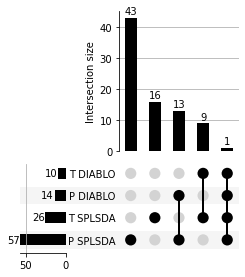

In [16]:
data_1 = [from_contents(x) for x in [all_features_1, viral_features_1]]
upset = UpSet(data_1[0], subset_size="count", show_counts="%d", sort_categories_by=None)
upset.plot()

In [17]:
prot_feat_all_comp_one = intersect(all_features_1, "P SPLSDA", "P DIABLO")
prot_feat_all_comp_one_annot = all_annotations[all_annotations["Entry"].isin(prot_feat_all_comp_one)]
prot_feat_all_comp_one_annot["Entry"].tolist()
print(prot_feat_all_comp_one_annot.shape)
prot_feat_all_comp_one_annot
# [print(x) for x in prot_feat_all_comp_one_annot["Entry"].tolist()]

(14, 5)


,Entry,Gene names,Protein names,Ontology,Organism
58,Q2TAA5,None,"GDP-Man:Man(3)GlcNAc(2)-PP-Dol alpha-1,2-manno...",NaN,Homo sapiens
96,Q7Z3J2,None,VPS35 endosomal protein sorting factor-like;VP...,NaN,Homo sapiens
109,Q15465,None,Sonic hedgehog protein;SHH;ortholog,NaN,Homo sapiens
163,P06748,None,Nucleophosmin;NPM1;ortholog,chaperone(PC00072),Homo sapiens
200,Q9NPE3,None,H/ACA ribonucleoprotein complex subunit 3;NOP1...,RNA binding protein(PC00031),Homo sapiens
321,Q99519,None,Sialidase-1;NEU1;ortholog,hydrolase(PC00121),Homo sapiens
366,O95274,None,Ly6/PLAUR domain-containing protein 3;LYPD3;or...,transmembrane signal receptor(PC00197),Homo sapiens
395,O15162,None,Phospholipid scramblase 1;PLSCR1;ortholog,transporter(PC00227),Homo sapiens
413,P0DTC1,NaN,Replicase polyprotein 1a (pp1a) (ORF1a polypro...,None,Severe acute respiratory syndrome coronavirus ...
445,P0DTD2,9b,ORF9b protein (Accessory protein 9b) (ORF-9b) ...,None,Severe acute respiratory syndrome coronavirus ...


In [30]:
print("Features detected by single omics methods only in proteome")
prot_feat_all_comp_one = intersect(all_features_1, "P SPLSDA", "P DIABLO")
prot_feat_all_comp_one_union = union(all_features_1, "P SPLSDA", "P DIABLO")
prot_feat_all_comp_one_invert = list(set(prot_feat_all_comp_one_union) - set(prot_feat_all_comp_one))
prot_feat_all_comp_one_invert = all_annotations[all_annotations["Entry"].isin(prot_feat_all_comp_one_invert)]
prot_feat_all_comp_one_invert["Entry"].tolist()
print(prot_feat_all_comp_one_invert.shape)
# [print(x) for x in prot_feat_all_comp_all_invert["Entry"].tolist()]
prot_feat_all_comp_one_invert

Features detected by single omics methods only in proteome
(41, 5)


,Entry,Gene names,Protein names,Ontology,Organism
2,P02647,None,Apolipoprotein A-I;APOA1;ortholog,NaN,Homo sapiens
16,P46060,None,Ran GTPase-activating protein 1;RANGAP1;ortholog,GTPase-activating protein(PC00257),Homo sapiens
23,Q01105,None,Protein SET;SET;ortholog,"chromatin/chromatin-binding, or -regulatory pr...",Homo sapiens
52,Q3ZCQ8,None,Mitochondrial import inner membrane translocas...,NaN,Homo sapiens
55,O60506,None,Heterogeneous nuclear ribonucleoprotein Q;SYNC...,RNA binding protein(PC00031),Homo sapiens
74,P05784,None,"Keratin, type I cytoskeletal 18;Krt18;ortholog",NaN,Mus musculus
83,O94788,None,Retinal dehydrogenase 2;ALDH1A2;ortholog,dehydrogenase(PC00092),Homo sapiens
84,P10809,None,"60 kDa heat shock protein, mitochondrial;HSPD1...",NaN,Homo sapiens
97,Q9Y5Y6,None,Suppressor of tumorigenicity 14 protein;ST14;o...,serine protease(PC00203),Homo sapiens
140,O43291,None,Kunitz-type protease inhibitor 2;SPINT2;ortholog,NaN,Homo sapiens


Proteomic features across the **first component which best discriminate between all sample categories common across single omics and multi omics data** show no significant pathway enrichment. Various viral features are present as well, but not included in pathway analysis due to their novelty.

In [18]:
tran_feat_all_comp_one = intersect(all_features_1, "T SPLSDA", "T DIABLO")
tran_feat_all_comp_one_annot = all_annotations[all_annotations["Entry"].isin(tran_feat_all_comp_one)]
tran_feat_all_comp_one_annot["Entry"].tolist()
print(tran_feat_all_comp_one_annot.shape)
tran_feat_all_comp_one_annot
# [print(x) for x in tran_feat_all_comp_one_annot["Entry"].tolist()]

(10, 5)


,Entry,Gene names,Protein names,Ontology,Organism
57,Q96A33,None,Coiled-coil domain-containing protein 47;CCDC4...,NaN,Homo sapiens
96,Q7Z3J2,None,VPS35 endosomal protein sorting factor-like;VP...,NaN,Homo sapiens
150,Q5T6V5,None,Queuosine salvage protein;C9orf64;ortholog,NaN,Homo sapiens
177,P21291,None,Cysteine and glycine-rich protein 1;CSRP1;orth...,actin or actin-binding cytoskeletal protein(PC...,Homo sapiens
226,Q9NX63,None,MICOS complex subunit MIC19;CHCHD3;ortholog,NaN,Homo sapiens
233,Q07021,None,Complement component 1 Q subcomponent-binding ...,NaN,Homo sapiens
277,Q03701,None,CCAAT/enhancer-binding protein zeta;CEBPZ;orth...,DNA-binding transcription factor(PC00218),Homo sapiens
302,P47756,None,F-actin-capping protein subunit beta;CAPZB;ort...,non-motor actin binding protein(PC00165),Homo sapiens
371,Q00839,None,Heterogeneous nuclear ribonucleoprotein U;HNRN...,NaN,Homo sapiens
397,Q9Y281,None,Cofilin-2;CFL2;ortholog,non-motor actin binding protein(PC00165),Homo sapiens


In [31]:
print("Features detected by single omics methods only in translatome")
tran_feat_all_comp_one = intersect(all_features_1, "T SPLSDA", "T DIABLO")
tran_feat_all_comp_one_union = union(all_features_1, "T SPLSDA", "T DIABLO")
tran_feat_all_comp_one_invert = list(set(tran_feat_all_comp_one_union) - set(tran_feat_all_comp_one))
tran_feat_all_comp_one_invert = all_annotations[all_annotations["Entry"].isin(tran_feat_all_comp_one_invert)]
tran_feat_all_comp_one_invert["Entry"].tolist()
print(tran_feat_all_comp_one_invert.shape)
# [print(x) for x in tran_feat_all_comp_all_invert["Entry"].tolist()]
tran_feat_all_comp_one_invert

Features detected by single omics methods only in translatome
(15, 5)


,Entry,Gene names,Protein names,Ontology,Organism
28,P07858,None,Cathepsin B;CTSB;ortholog,cysteine protease(PC00081),Homo sapiens
29,Q15758,None,Neutral amino acid transporter B(0);SLC1A5;ort...,primary active transporter(PC00068),Homo sapiens
46,Q96BN8,None,Ubiquitin thioesterase otulin;OTULIN;ortholog,NaN,Homo sapiens
53,Q96DG6,None,Carboxymethylenebutenolidase homolog;CMBL;orth...,NaN,Homo sapiens
78,Q8WXX5,None,DnaJ homolog subfamily C member 9;DNAJC9;ortholog,NaN,Homo sapiens
143,O43242,None,26S proteasome non-ATPase regulatory subunit 3...,protease(PC00190),Homo sapiens
161,Q12864,None,Cadherin-17;CDH17;ortholog,NaN,Homo sapiens
168,Q15642,None,Cdc42-interacting protein 4;TRIP10;ortholog,NaN,Homo sapiens
182,P30520,None,Adenylosuccinate synthetase isozyme 2;ADSS;ort...,ligase(PC00142),Homo sapiens
194,Q9Y230,None,RuvB-like 2;RUVBL2;ortholog,NaN,Homo sapiens


Translatomic features across the **first component which best discriminate between all sample categories common across single omics and multi omics data** show no significant pathway enrichment. Various viral features are present as well, but not included in pathway analysis due to their novelty.

## Reviewing low level features (component 1) contributing to classification of viral samples post 24 hour infection

We then selected features which best discriminated **viral samples post 24 hour infection against other samples** from the **first component**. We note that this sample category (Virus 24h) was the most distinct from all other sample categories (*not shown in this document*).

We observed similarities in patterns when assessing features across all components and only the first component. Using features contributing to the 24 hour post infection category only, we show that features identified segregate by type of analysis (single omics vs multi omics). This suggests that single omics and multi omics analyses are detecting different features. (*how to investigate which is more accurate, single-omics or multi-omics? refer to biology of individual features/pathways?*)

{'matrix': <matplotlib.axes._subplots.AxesSubplot at 0x11daeda60>,
 'shading': <matplotlib.axes._subplots.AxesSubplot at 0x11db560a0>,
 'totals': <matplotlib.axes._subplots.AxesSubplot at 0x11daed970>,
 'intersections': <matplotlib.axes._subplots.AxesSubplot at 0x11dd55d90>}

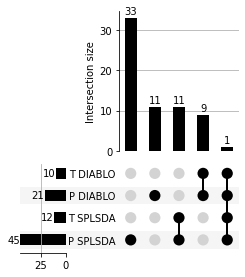

In [19]:
upset = UpSet(data_1[1], subset_size="count", show_counts="%d", sort_categories_by=None)
upset.plot()

In [20]:
splsda_feat_vir_comp_one = intersect(viral_features_1, "P SPLSDA", "T SPLSDA")
splsda_feat_vir_comp_one_annot = all_annotations[all_annotations["Entry"].isin(splsda_feat_vir_comp_one)]
splsda_feat_vir_comp_one_annot["Entry"].tolist()
print(splsda_feat_vir_comp_one_annot.shape)
splsda_feat_vir_comp_one_annot
# [print(x) for x in splsda_feat_vir_comp_one_annot["Entry"].tolist()]

(12, 5)


,Entry,Gene names,Protein names,Ontology,Organism
58,Q2TAA5,None,"GDP-Man:Man(3)GlcNAc(2)-PP-Dol alpha-1,2-manno...",NaN,Homo sapiens
96,Q7Z3J2,None,VPS35 endosomal protein sorting factor-like;VP...,NaN,Homo sapiens
163,P06748,None,Nucleophosmin;NPM1;ortholog,chaperone(PC00072),Homo sapiens
200,Q9NPE3,None,H/ACA ribonucleoprotein complex subunit 3;NOP1...,RNA binding protein(PC00031),Homo sapiens
366,O95274,None,Ly6/PLAUR domain-containing protein 3;LYPD3;or...,transmembrane signal receptor(PC00197),Homo sapiens
395,O15162,None,Phospholipid scramblase 1;PLSCR1;ortholog,transporter(PC00227),Homo sapiens
413,P0DTC1,NaN,Replicase polyprotein 1a (pp1a) (ORF1a polypro...,None,Severe acute respiratory syndrome coronavirus ...
445,P0DTD2,9b,ORF9b protein (Accessory protein 9b) (ORF-9b) ...,None,Severe acute respiratory syndrome coronavirus ...
704,P0DTC9,N,Nucleoprotein (Nucleocapsid protein) (NC) (Pro...,None,Severe acute respiratory syndrome coronavirus ...
718,P0DTC3,3a,ORF3a protein (Accessory protein 3a) (Protein ...,None,Severe acute respiratory syndrome coronavirus ...


**Within the single omics analysis, we examine features across the first component which best discriminate between 24h viral infection samples against all other sample categories in both proteome and translatome**. No significant pathways are detected during pathway enrichment. Various viral features are present as well, but not included in pathway analysis due to their novelty.

In [21]:
diablo_feat_vir_comp_one = intersect(viral_features_1, "P DIABLO", "T DIABLO")
diablo_feat_vir_comp_one_annot = all_annotations[all_annotations["Entry"].isin(diablo_feat_vir_comp_one)]
diablo_feat_vir_comp_one_annot["Entry"].tolist()
print(diablo_feat_vir_comp_one_annot.shape)
diablo_feat_vir_comp_one_annot
# [print(x) for x in diablo_feat_vir_comp_one_annot["Entry"].tolist()]

(10, 5)


,Entry,Gene names,Protein names,Ontology,Organism
57,Q96A33,None,Coiled-coil domain-containing protein 47;CCDC4...,NaN,Homo sapiens
96,Q7Z3J2,None,VPS35 endosomal protein sorting factor-like;VP...,NaN,Homo sapiens
150,Q5T6V5,None,Queuosine salvage protein;C9orf64;ortholog,NaN,Homo sapiens
177,P21291,None,Cysteine and glycine-rich protein 1;CSRP1;orth...,actin or actin-binding cytoskeletal protein(PC...,Homo sapiens
226,Q9NX63,None,MICOS complex subunit MIC19;CHCHD3;ortholog,NaN,Homo sapiens
233,Q07021,None,Complement component 1 Q subcomponent-binding ...,NaN,Homo sapiens
277,Q03701,None,CCAAT/enhancer-binding protein zeta;CEBPZ;orth...,DNA-binding transcription factor(PC00218),Homo sapiens
302,P47756,None,F-actin-capping protein subunit beta;CAPZB;ort...,non-motor actin binding protein(PC00165),Homo sapiens
371,Q00839,None,Heterogeneous nuclear ribonucleoprotein U;HNRN...,NaN,Homo sapiens
397,Q9Y281,None,Cofilin-2;CFL2;ortholog,non-motor actin binding protein(PC00165),Homo sapiens


**Within the multi omics analysis, we examine features across the first component which best discriminate between 24h viral infection samples against all other sample categories in both proteome and translatome**. No significant pathways are detected during pathway enrichment. Various viral features are present as well, but not included in pathway analysis due to their novelty.

(*For reference only, add another set representing filtered correlations between features across and within omics. Not directly comparable! This is a subset of the features highlighted by the multi omics analysis and further filtered by correlation scores*)

Features contributing to all classifications


{'matrix': <matplotlib.axes._subplots.AxesSubplot at 0x11dde6130>,
 'shading': <matplotlib.axes._subplots.AxesSubplot at 0x11dddfdf0>,
 'totals': <matplotlib.axes._subplots.AxesSubplot at 0x11de8f6d0>,
 'intersections': <matplotlib.axes._subplots.AxesSubplot at 0x11dec2ac0>}

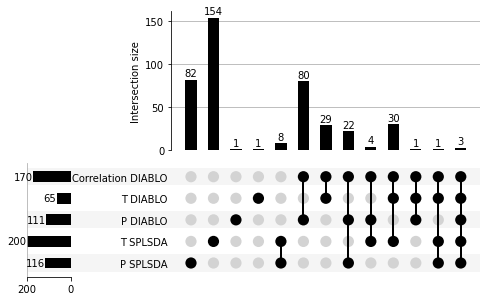

In [22]:
categories = [
    "P SPLSDA", "T SPLSDA", 
    "P DIABLO", "T DIABLO",
    "Correlation DIABLO",
]

all_features = [
    prot_splsda[0].tolist(),
    tran_splsda[0].tolist(),
    prot_diablo[0].tolist(),
    tran_diablo[0].tolist(),
# ]
] + [correlations[2]]

all_features = dict(zip(categories, parse_entries(all_features)))

viral_features = [extract_entries(i) for i in all_workflows]
viral_features = dict(zip(categories, parse_entries(viral_features) + [correlations[2]]))

all_features_corr = dict(zip(list(all_features.keys()), list(all_features.values())))
upset = UpSet(from_contents(all_features_corr), subset_size="count", 
              show_counts="%d", sort_categories_by=None)
print("Features contributing to all classifications")
upset.plot()

Features contributing to 24h viral infection


{'matrix': <matplotlib.axes._subplots.AxesSubplot at 0x11df83fa0>,
 'shading': <matplotlib.axes._subplots.AxesSubplot at 0x11df66760>,
 'totals': <matplotlib.axes._subplots.AxesSubplot at 0x11e0a0a90>,
 'intersections': <matplotlib.axes._subplots.AxesSubplot at 0x11e0dac10>}

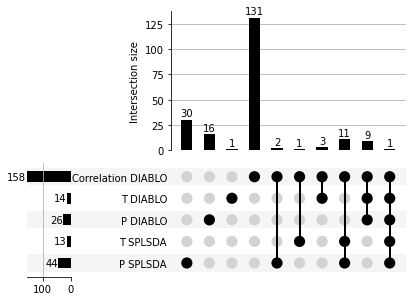

In [23]:
upset = UpSet(from_contents(viral_features), subset_size="count", 
              show_counts="%d", sort_categories_by=None)
print("Features contributing to 24h viral infection")
upset.plot()

In [24]:
# compare list of features in correlations before and after filtering
before = diablo_corr["translatome"].tolist() + diablo_corr["proteome"].tolist()
before = set([y for z in [x.split("_") for x in before] for y in z])
after = filtered_corr["translatome"].tolist() + filtered_corr["proteome"].tolist()
after = set([y for z in [x.split("_") for x in after] for y in z])
all_annotations[all_annotations["Entry"].isin(list(before - after))]

,Entry,Gene names,Protein names,Ontology,Organism
151,Q96DB5,None,Regulator of microtubule dynamics protein 1;RM...,NaN,Homo sapiens
262,Q9UHR5,None,SAP30-binding protein;SAP30BP;ortholog,NaN,Homo sapiens


Comparing the list of correlated features before and after filtering, two features are absent. A possible reason is redundancies in the correlation, as many-to-many feature correlations are possible. In addition, we summarise pairwise feature correlations into individual, unique features which further collapses the information.

In [25]:
# repeat previous cell for further filtered correlations for each of the 4 different workflows